<h1><center>Neglected Tropical Diseases in Africa and their eradication</center></h1>
<h4><center>
<a style="text-decoration:none" href="https://github.com/nikhil-405">Nikhil Goyal</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author2>@iitgn.ac.in">23110218@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://github.com/SurriyaGokul">Surriya Gokul</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author2>@iitgn.ac.in">23110324@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://github.com/VedantSharan">Vedant Sharan Raykwar</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author2>@iitgn.ac.in">23110354@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://github.com/zainabkapadia52">Zainab Kapadia</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<author1>@iitgn.ac.in">23110373@iitgn.ac.in</a>
<br><br>

</center></h4>

### Introduction

Neglected Tropical Diseases (NTDs) are a diverse group of infectious diseases that primarily affect the world's poorest populations. In Africa, two of the most prominent NTDs are Soil-Transmitted Helminthiases (STH) and Lymphatic Filariasis (LF), both of which contribute significantly to disability and lost economic productivity. While these diseases are preventable and treatable, progress towards their eradication requires not just medication but also robust public health strategies, sanitation infrastructure, and consistent programmatic effort.

This report aims to analyze the eradication efforts of STH and LF across African nations using a data-driven lens. We explore how economic capacity (measured via GDP per capita), health infrastructure (represented by sanitation statistics), and temporal trends relate to programmatic coverage levels. In doing so, we seek to identify patterns, reveal high-performing countries that exceed expectations, and provide insights that could guide future public health strategies.

### Analysis of lymphatic filariasis and soil‑transmitted helminthiases Spread in Africa 

Among the 20 recognized NTDs, Lymphatic Filariasis (LF) and Soil-Transmitted Helminthiasis (STH) stand out due to their high prevalence, chronic impact, and the feasibility of large-scale treatment through preventive chemotherapy (PC).

Africa is home to over 40% of the global LF burden and a significant portion of SAC (School-Aged Children) population at risk of STH, making these two diseases crucial targets for mass drug administration (MDA) programs. Their elimination as public health problems is within reach, but only if high national coverage is achieved and barriers to treatment—economic, infrastructural, and social—are addressed.

In [307]:
# Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interactive
import plotly.io as pio
import plotly.express as px
import warnings
import os

data_dir = "data"

warnings.filterwarnings('ignore')
pio.renderers.default='notebook'
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Data Preparation and integration

To ensure focused and robust analysis, the dataset was restricted to African countries, based on official regional classifications. Separate datasets for Lymphatic Filariasis (LF) and Soil-Transmitted Helminthiasis (STH) were extracted from WHO program files and merged with country-level indicators of GDP per capita, health expenditure, and sanitation access.

In [308]:
df= pd.read_excel("data/STH_data.xlsx")
df= df[df["region"] == "AFR"].copy()
df.sort_values(by="year", inplace=True)
df.drop(columns=["region", "country"], inplace=True)
df["country_code"]= df["country_code"].str.upper()
df.rename(columns={"year": "Year","country_code": "CountryCode"}, inplace=True)
df.to_csv("data/STH_summary.csv", index=False)


df= pd.read_excel("data/LF_data.xlsx")
df= df[df["Region"] == "AFR"].copy()
df.sort_values(by="Year", inplace=True)
df.drop(columns=["Region", "Country"], inplace=True)
df["country_code"]= df["country_code"].str.upper()
df.rename(columns={"country_code": "CountryCode"}, inplace=True)
df.to_csv( "data/LF_summary.csv", index=False)


df = pd.read_csv("data/COUNTRY.csv")
african_countries_df = df[df["ParentCode"] == "AFR"]
african_country_codes = african_countries_df["Code"].tolist()


gdp_df = pd.read_csv("data/GDP.csv") 
gdp_africa = gdp_df[gdp_df["Country Code"].isin(african_country_codes)].copy()
gdp_africa.drop(columns=["Country Name", "Indicator Name", "Indicator Code"], inplace=True)
gdp_africa.rename(columns={"Country Code": "CountryCode"}, inplace=True)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
gdp_africa.to_csv("data/gdp_per_capita_africa.csv", index=False)


df = pd.read_csv("data/health_expenditure_per_capita.csv")  
df = df[df["Country Code"].isin(african_country_codes)].copy()
columns_to_drop = ["Country Name", "Unnamed: 0"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.rename(columns={"Country Code": "CountryCode"}, inplace=True)
df.to_csv("data/health_expenditure_per_capita_africa.csv", index=False)


df = pd.read_csv("data/edited_API_SH.STA.BASS.ZS_DS2_EN_CSV_v2_65890.csv")
df = df[df["Country Code"].isin(african_country_codes)].copy()
columns_to_drop = ["Country Name", "Unnamed: 0"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.rename(columns={"Country Code": "CountryCode"}, inplace=True)
df.to_csv("data/sanitation_africa.csv", index=False)


available_country_codes = ['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD', 'COG','COM', 'CPV', 'DZA', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN', 'GMB', 'GNB','GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 
                           'MLI', 'MOZ', 'MRT', 'MUS', 'MWI','NAM', 'NER', 'NGA', 'RWA', 'SEN', 'SLE', 'SSD', 'STP', 'SWZ', 'SYC','TCD', 'TGO', 'TZA', 'UGA', 'ZAF', 'ZMB', 'ZWE']

# List of disease names
diseases= ["STH","LF"]
for disease_name in diseases:
    file_path= f"data/{disease_name}_summary.csv"
    df= pd.read_csv(file_path)
    df_filtered= df[df["CountryCode"].isin(available_country_codes)].copy()
    filtered_path= f"data/{disease_name}_filtered.csv"
    df_filtered.to_csv(filtered_path, index=False)

In [309]:
lf= pd.read_csv("data/LF_filtered.csv")
sth= pd.read_csv("data/STH_filtered.csv")

# Dropping columns with >70% missing values
def drop_high_missing(df, threshold=0.7):
    return df.loc[:, df.isna().mean() <= threshold]

lf_clean= drop_high_missing(lf)
sth_clean= drop_high_missing(sth)
lf_clean.replace("No data", pd.NA, inplace=True)
sth_clean.replace("No data", pd.NA, inplace=True)

# Imputing numeric columns by country using transform 
for df in (lf_clean, sth_clean):
    num_cols = df.select_dtypes(include='number').columns.drop('Year', errors='ignore')
    df[num_cols] = df.groupby("CountryCode")[num_cols] \
                     .transform(lambda grp: grp.interpolate(method='linear').ffill().bfill())
    cat_cols = [c for c in df.columns if c not in num_cols and c not in ["CountryCode", "Year"]]
    for col in cat_cols:
        df[col] = df.groupby("CountryCode")[col].transform(
            lambda grp: grp.fillna(grp.mode().iloc[0] if not grp.mode().empty else pd.NA)
        )


lf_clean.to_csv("data/LF_cleaned.csv", index=False)
sth_clean.to_csv("data/STH_cleaned.csv", index=False)

In [310]:
columns_to_fix_lf= ["Number of IUs covered","Geographical coverage (%)","Total population of IUs","Reported number of people treated","Programme (drug) coverage (%)","National coverage (%)"]
lf_clean[columns_to_fix_lf]= lf_clean[columns_to_fix_lf].apply(pd.to_numeric, errors='coerce')

columns_to_fix_sth = ["Population requiring PC for STH, Pre-SAC","Programme coverage, Pre-SAC (%)","Population requiring PC for STH, SAC","Programme coverage, SAC (%)"]
sth_clean[columns_to_fix_sth] = sth_clean[columns_to_fix_sth].apply(pd.to_numeric, errors='coerce')

In [312]:
gdp_wide= pd.read_csv("data/gdp_per_capita_africa.csv",index_col=0)       
healthexp= pd.read_csv("data/health_expenditure_per_capita_africa.csv")
sanit= pd.read_csv("data/sanitation_africa.csv")

gdp_long= (gdp_wide.melt(id_vars="CountryCode", var_name="Year",value_name="GDP_per_capita").assign(Year=lambda df: df["Year"].astype(int)))

healthexp_long= (healthexp.melt(id_vars="CountryCode",var_name="Year",value_name="HealthExp_per_capita").assign(Year=lambda df: df["Year"].astype(int)))

sanit_long= (sanit.melt(id_vars="CountryCode",var_name="Year",value_name="Pct_with_improved_sanitation").assign(Year=lambda df: df["Year"].astype(int)))

cov= (gdp_long.merge(healthexp_long, on=["CountryCode","Year"], how="outer").merge(sanit_long,on=["CountryCode","Year"], how="outer"))

lf_full= lf_clean.merge(cov, on=["CountryCode","Year"], how="left")
sth_full= sth_clean.merge(cov, on=["CountryCode","Year"], how="left")

In [313]:
lf_final= lf_full.drop(columns=['Mapping status','Current status of MDA','Total population of IUs'])
sth_final= sth_full.drop(columns=['Number of Pre-SAC targeted'])

lf_final.to_csv('data/LF_final.csv', index=False)
sth_final.to_csv('data/STH_final.csv', index=False)

In [314]:
cols_lf = ["Population requiring PC for LF","Reported number of people treated", "Programme (drug) coverage (%)","National coverage (%)","Number of IUs covered"]

lf_no_data = lf_final.groupby("CountryCode")[cols_lf].apply(lambda df: df.isna().all().all())
lf_final = lf_final[~lf_final["CountryCode"].isin(lf_no_data[lf_no_data].index)]

# Interpolate within country over time
lf_final[cols_lf] = lf_final.groupby("CountryCode")[cols_lf].transform(lambda grp: grp.interpolate(method="linear", limit_direction="both"))

lf_final[["HealthExp_per_capita", "Pct_with_improved_sanitation"]] = lf_final.groupby("CountryCode")[["HealthExp_per_capita", "Pct_with_improved_sanitation"]].transform(lambda grp: grp.interpolate(method="linear", limit_direction="both"))

In [315]:
cols_sth = ["Population requiring PC for STH, SAC","Reported number of SAC treated","National coverage, SAC (%)"]

sth_final[cols_sth] = sth_final[cols_sth].apply(pd.to_numeric, errors='coerce')

sth_no_data = sth_final.groupby("CountryCode")[cols_sth].apply(lambda df: df.isna().all().all())
sth_final = sth_final[~sth_final["CountryCode"].isin(sth_no_data[sth_no_data].index)]

sth_final[cols_sth] = sth_final.groupby("CountryCode")[cols_sth].transform(lambda grp: grp.interpolate(method="linear", limit_direction="both"))

sth_final[["HealthExp_per_capita", "Pct_with_improved_sanitation"]] = sth_final.groupby("CountryCode")[["HealthExp_per_capita", "Pct_with_improved_sanitation"]].transform(lambda grp: grp.interpolate(method="linear", limit_direction="both"))

In [346]:
sth_final.drop(columns=["Programme coverage, Pre-SAC (%)","Population requiring PC for STH, Pre-SAC","Drug combination, Pre-SAC"], inplace=True, errors='ignore')
lf_final.drop(columns=["Geographical coverage (%)"], inplace=True, errors='ignore')

In [317]:
lf_final.dropna(subset=["Programme (drug) coverage (%)", "National coverage (%)"], inplace=True)
sth_final.dropna(subset=["National coverage, SAC (%)","National coverage, Pre-SAC (%)","Population requiring PC for STH, SAC","Number of SAC targeted","Reported number of SAC treated","Reported number of Pre-SAC treated"], inplace=True)

### LF Dataset Columns and Significance
| Column Name | Description | Significance |
|-------------|-------------|--------------|
| Year | Year of data | Used for trend analysis |
| Population requiring PC for LF | People needing treatment | Measures LF burden |
| Mapping status | Survey/mapping phase status | Implementation status indicator |
| Type of MDA | Drug regimen used | Useful for drug strategy analysis |
| Current status of MDA | Whether treatment is ongoing/completed | Progress tracking |
| Number of IUs covered | Administrative regions treated | Geographic reach of program |
| Geographical coverage (%) | % of regions covered by MDA | Area-based metric of success |
| Total population of IUs | Total population in covered areas | Denominator for analysis |
| Reported number of people treated | Actual treated count | Execution data |
| Programme (drug) coverage (%) | % of targeted treated | Program reach efficiency |
| National coverage (%) | % of entire at-risk population treated | True public health impact |
| CountryCode | Country identifier | For grouping and merging |
| GDP_per_capita | Economic metric | Resource context |
| HealthExp_per_capita | Health spending per person | System capacity proxy |
| Pct_with_improved_sanitation | % of population with access to sanitation | Prevention infrastructure metric |


### STH Dataset Columns and Significance
| Column Name | Description | Significance |
|-------------|-------------|--------------|
| Year | Calendar year | Enables time-series analysis |
| Population requiring PC for STH, Pre-SAC | Children aged 1–4 who need treatment | Indicates disease burden among toddlers |
| Number of Pre-SAC targeted | Planned coverage for Pre-SAC | Program planning insight |
| Reported number of Pre-SAC treated | Actual treated count (Pre-SAC) | Measures program success |
| Drug combination, Pre-SAC | Drugs used for Pre-SAC | Policy/treatment strategy |
| Programme coverage, Pre-SAC (%) | % of targeted Pre-SAC treated | Operational efficiency |
| National coverage, Pre-SAC (%) | % of all Pre-SAC needing treatment who were covered | Population-level impact |
| Population requiring PC for STH, SAC | Children aged 5–14 who need treatment | Indicates school-age burden |
| Number of SAC targeted | Planned treatment for SAC | Implementation planning |
| Reported number of SAC treated | Actual SAC treated | Execution quality |
| Drug combination, SAC | Drugs used for SAC | Program comparison |
| Programme coverage, SAC (%) | % of SAC targeted population treated | Efficiency metric |
| National coverage, SAC (%) | % of all SAC children needing treatment who were treated | Public health success |
| CountryCode | ISO country code | Aggregation, filtering, and merging |
| GDP_per_capita | National income per person | Economic context |
| HealthExp_per_capita | Health expenditure per person | National investment in health |
| Pct_with_improved_sanitation | % of people with proper sanitation | Infrastructure-related prevention |

### Data visualisation

In [318]:
lf = pd.read_csv('data/LF_final.csv')
sth = pd.read_csv('data/STH_final.csv')

lf['Population requiring PC for LF'] = pd.to_numeric(lf['Population requiring PC for LF'], errors='coerce')
sth['Population requiring PC for STH, Pre-SAC'] = pd.to_numeric(sth['Population requiring PC for STH, Pre-SAC'], errors='coerce')

lf_year = (lf.groupby('Year')['Population requiring PC for LF'].sum().reset_index(name='Pop_PC').assign(Disease='LF'))
sth_year = (sth.groupby('Year')['Population requiring PC for STH, Pre-SAC'].sum().reset_index(name='Pop_PC').assign(Disease='STH'))

df= pd.concat([lf_year, sth_year], ignore_index=True)
fig= px.line(df,x='Year',y='Pop_PC',color='Disease',labels={'Pop_PC':'Population Requiring PC'},title='Trend of Population Requiring Preventive Chemotherapy: LF and STH')
fig.update_layout(xaxis=dict(dtick=1), yaxis_title='Population Requiring PC')
fig.show()

This plot illustrates the temporal trend in the population requiring preventive chemotherapy for Lymphatic Filariasis (LF) and Soil-Transmitted Helminthiasis (STH) across African countries from 2000 to 2023.

LF Need Peaked Earlier: The LF curve shows a sharp rise between 2008–2013, reaching over 450 million, followed by a gradual decline post-2014. This reflects the intensification of LF mapping efforts and mass drug administration (MDA) campaigns during the Global Programme to Eliminate LF (GPELF) scale-up phase. The subsequent decline suggests successful coverage, shrinking endemic zones, or improved impact assessments reducing target populations.
STH Need Growing More Gradually: In contrast, the population requiring PC for STH exhibits a steadier rise, peaking around 2017 before stabilizing. This trend may correspond to school-based deworming initiatives and delayed programmatic scale-up, especially for Pre-SAC (pre-school age children) populations who were historically underprioritized.
Post-2019 Dips: The noticeable dips around 2019–2020 for both diseases likely reflect COVID-19 disruptions, where MDA campaigns were halted or delayed due to lockdowns and health system re-prioritization.

Both diseases demonstrate different epidemiological footprints and intervention histories. While LF has seen global prioritization for elimination (with stronger mapping and exit assessments), STH control has often faced resource fragmentation and variable country ownership, especially in reaching non-school-age populations.

In [319]:
code_to_name = {'AGO': 'Angola', 'BDI': 'Burundi', 'BEN': 'Benin', 'BFA': 'Burkina Faso', 'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CIV': "Côte d'Ivoire", 'CMR': 'Cameroon', 
                'COD': 'Democratic Republic of the Congo', 'COG': 'Republic of the Congo', 'COM': 'Comoros', 'CPV': 'Cape Verde', 'DZA': 'Algeria', 'ERI': 'Eritrea', 'ETH': 'Ethiopia', 
                'GAB': 'Gabon', 'GHA': 'Ghana', 'GIN': 'Guinea', 'GMB': 'Gambia', 'GNB': 'Guinea-Bissau', 'GNQ': 'Equatorial Guinea', 'KEN': 'Kenya', 'LBR': 'Liberia', 'LSO': 'Lesotho', 
                'MDG': 'Madagascar', 'MLI': 'Mali', 'MOZ': 'Mozambique', 'MRT': 'Mauritania', 'MUS': 'Mauritius', 'MWI': 'Malawi', 'NAM': 'Namibia', 'NER': 'Niger', 'NGA': 'Nigeria', 'RWA': 'Rwanda', 
                'SEN': 'Senegal', 'SLE': 'Sierra Leone', 'SSD': 'South Sudan', 'STP': 'São Tomé and Príncipe', 'SWZ': 'Eswatini', 'SYC': 'Seychelles', 'TCD': 'Chad', 'TGO': 'Togo', 'TZA': 'Tanzania', 
                'UGA': 'Uganda', 'ZAF': 'South Africa', 'ZMB': 'Zambia', 'ZWE': 'Zimbabwe'}

lf['CountryName'] = lf['CountryCode'].map(code_to_name)

fig_lf = px.choropleth(lf,locations='CountryCode',color='Population requiring PC for LF',hover_name='CountryName',animation_frame='Year',color_continuous_scale='Viridis',
                       range_color=[0, lf['Population requiring PC for LF'].max()],scope='africa',labels={'Population requiring PC for LF':'Pop. requiring PC'},
                       title='LF: Population Requiring Preventive Chemotherapy Over Time')
fig_lf.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_lf.show()

Countries like Nigeria (NGA), Democratic Republic of the Congo (COD), Mozambique (MOZ), and Tanzania (TZA) consistently show the darkest shades, indicating the highest LF-burdened populations. These countries are among the most populous in sub-Saharan Africa and have had long-standing endemicity, which explains their persistent high treatment needs. 

Southern African countries (e.g., Botswana, Lesotho, Namibia) remain largely unaffected by LF or have already achieved elimination status. Central and West African regions, however, retain a high disease burden, with countries like Chad (TCD) and Guinea (GIN) showing sustained PC needs.

In [320]:
# STH choropleth
fig_sth = px.choropleth(sth,locations='CountryCode',color='Population requiring PC for STH, Pre-SAC',hover_name='CountryCode',animation_frame='Year',color_continuous_scale='Plasma',
                        range_color=[0,sth['Population requiring PC for STH, Pre-SAC'].max()],scope='africa',labels={'Population requiring PC for STH, Pre-SAC':'Pop. requiring PC'},
                        title='STH: Population Requiring Preventive Chemotherapy Over Time'
)
fig_sth.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig_sth.show()


This choropleth map visualizes the evolution of the population requiring preventive chemotherapy (PC) for Soil-Transmitted Helminthiases (STH) among preschool-aged children (Pre-SAC) across African countries over the years 2003 to 2023. The burden of STH is spread widely across sub-Saharan Africa, but unlike LF, the intensity of need is more evenly distributed. 

Countries like Ethiopia (ETH), Democratic Republic of the Congo (COD), and Tanzania (TZA) consistently show high PC needs, reflecting their large populations and endemic STH prevalence. Eastern and Central Africa emerge as high-burden zones (e.g., Uganda, Kenya, Mozambique, and Madagascar), where tropical climates and limited sanitation infrastructure facilitate persistent STH transmission. West African countries (e.g., Ghana, Nigeria) also appear frequently with high need levels, though with slightly lower magnitudes than LF.

As expected, North African countries do not appear on the map, consistent with STH being predominantly a problem in tropical and subtropical climates.

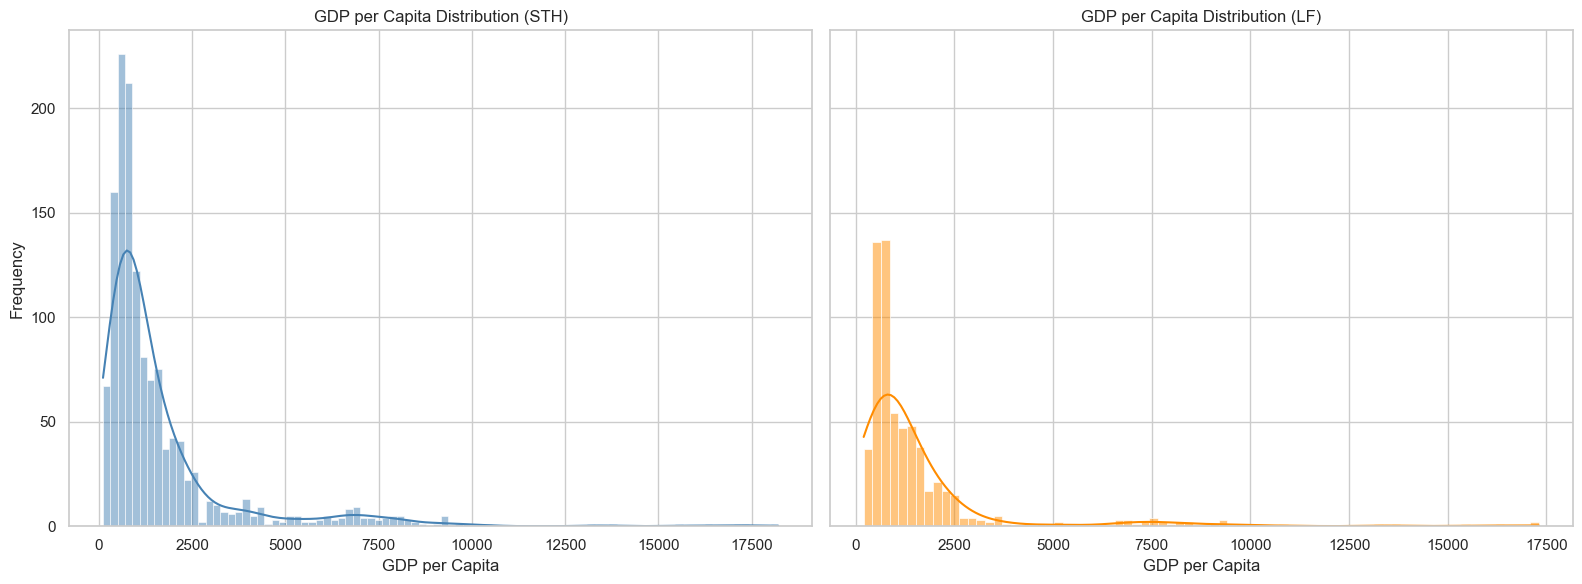

In [321]:
import statsmodels.api as sm

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# STH GDP Distribution
sns.histplot(sth['GDP_per_capita'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('GDP per Capita Distribution (STH)')
axes[0].set_xlabel('GDP per Capita')
axes[0].set_ylabel('Frequency')

# LF GDP Distribution
sns.histplot(lf['GDP_per_capita'], kde=True, ax=axes[1], color='darkorange')
axes[1].set_title('GDP per Capita Distribution (LF)')
axes[1].set_xlabel('GDP per Capita')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

The histogram of GDP per capita for both sth and lf shows a right-skewed distribution, with the majority of African countries clustering in the lower income range (< $2000). Only a small handful of countries appear to have significantly higher GDP values (possibly outliers like Seychelles or Botswana). This supports the need to analyze coverage performance under resource-constrained settings, as most countries fall within a narrow low-income band.

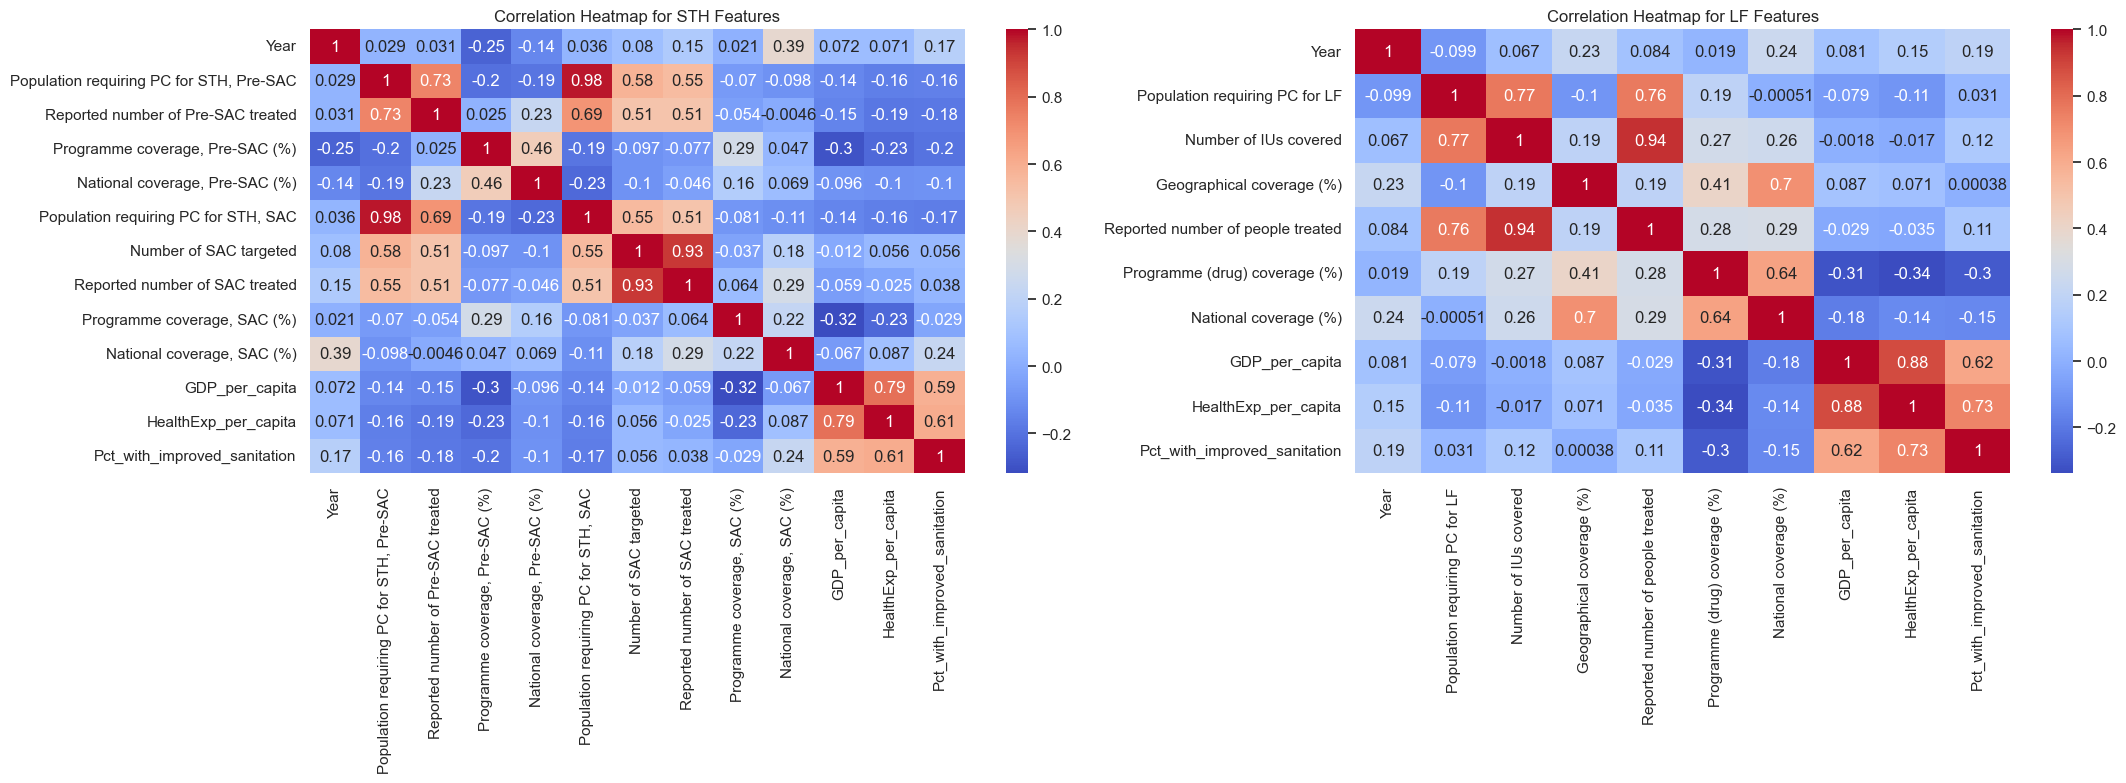

In [322]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Correlation heatmap for STH
sns.heatmap(sth.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation Heatmap for STH Features")

# Correlation heatmap for LF
sns.heatmap(lf.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Heatmap for LF Features")

plt.tight_layout()
plt.show()

STH:-

Population requiring PC for STH, Pre-SAC is strongly correlated with:
Reported number of Pre-SAC treated (r = 0.73)
Population requiring PC for STH, SAC (r = 0.98)
Number of SAC targeted (r = 0.58)
Reported number of SAC treated (r = 0.55)
This shows that higher PC requirements at the national level are typically accompanied by scaled-up treatment efforts. This also indicates that countries with large Pre-SAC burdens tend to have correspondingly large SAC burdens, pointing to systemic disease prevalence.

GDP per capita, health expenditure per capita, and % with improved sanitation all show weak to moderate positive correlations with National coverage. This aligns with the expectation that better-resourced countries are more capable of delivering deworming programs effectively.

LF:-

Reported number of people treated and Number of IUs covered (0.94): As expected, more implementation units (IUs) lead to more people being treated.

Programme (drug) coverage (%) and National coverage (%) (0.64): Suggests consistent reporting and successful implementation.

HealthExp_per_capita and GDP_per_capita (0.88), HealthExp_per_capita and Pct_with_improved_sanitation (0.73): Wealthier countries tend to spend more on health and have better sanitation.

### National coverage has improved consistently over time for both LF and STH, reflecting long-term global and regional public health interventions.

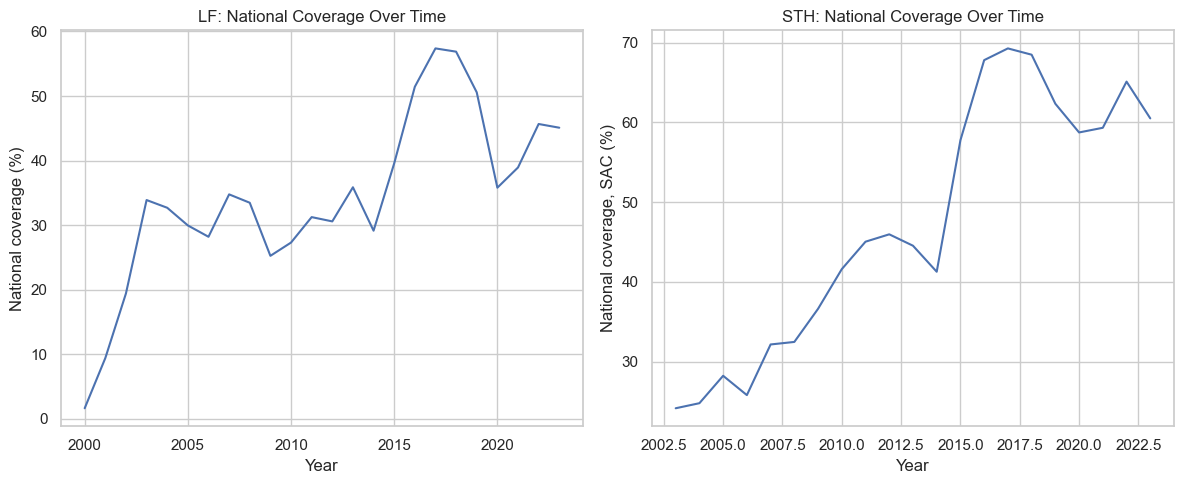

In [323]:
# Aggregate yearly mean coverage
lf_time = lf_final.groupby("Year")["National coverage (%)"].mean().reset_index()
sth_time = sth_final.groupby("Year")["National coverage, SAC (%)"].mean().reset_index()

# Plot trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=lf_time, x="Year", y="National coverage (%)")
plt.title("LF: National Coverage Over Time")

plt.subplot(1, 2, 2)
sns.lineplot(data=sth_time, x="Year", y="National coverage, SAC (%)")
plt.title("STH: National Coverage Over Time")
plt.tight_layout()
plt.show()

The time series plots show a general upward trend in national treatment coverage for both Lymphatic Filariasis (LF) and Soil-Transmitted Helminthiases (STH). Although the curves exhibit fluctuations, the long-term pattern reflects increased access and programmatic success, especially post-2010. This supports the hypothesis that international and local intervention efforts, such as WHO mass drug administration (MDA) campaigns, have scaled up over time. Some mid-period declines may reflect funding or implementation gaps. Overall, both diseases show strong upward movement in coverage, validating efforts towards disease eradication. A positive and statistically significant correlation between year and coverage would affirm this trend.

In [324]:
import statsmodels.api as sm

# LF: Coverage over Time
lf_time_df = lf_final[["Year", "National coverage (%)"]].dropna()
X_lf_time = sm.add_constant(lf_time_df["Year"])
y_lf_time = lf_time_df["National coverage (%)"]
lf_time_model = sm.OLS(y_lf_time, X_lf_time).fit()
print("LF: Year vs Coverage Regression")
print(lf_time_model.summary())

# STH: Coverage over Time
sth_time_df = sth_final[["Year", "National coverage, SAC (%)"]].dropna()
X_sth_time = sm.add_constant(sth_time_df["Year"])
y_sth_time = sth_time_df["National coverage, SAC (%)"]
sth_time_model = sm.OLS(y_sth_time, X_sth_time).fit()
print("\nSTH: Year vs Coverage Regression")
print(sth_time_model.summary())

LF: Year vs Coverage Regression
                              OLS Regression Results                             
Dep. Variable:     National coverage (%)   R-squared:                       0.060
Model:                               OLS   Adj. R-squared:                  0.058
Method:                    Least Squares   F-statistic:                     37.42
Date:                   Wed, 23 Apr 2025   Prob (F-statistic):           1.73e-09
Time:                           14:25:15   Log-Likelihood:                -2857.5
No. Observations:                    592   AIC:                             5719.
Df Residuals:                        590   BIC:                             5728.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

The regression analysis confirms this: for LF, coverage increased by ~1.32 percentage points per year (p < 0.001), while STH coverage grew by ~2.28 percentage points per year (p < 0.001). This strongly supports our hypothesis. The R² values (0.06 for LF, 0.15 for STH) indicate that time explains a modest proportion of the variance, suggesting other contextual factors also influence coverage. Nonetheless, the clear upward trend highlights significant progress in tackling NTDs through consistent health interventions.

### While GDP per capita is often used as a proxy for national capacity, we hypothesize that some countries outperform expectations due to efficient governance or external support. We fit a regression of national coverage on GDP per capita, then analyze residuals to find countries doing better or worse than predicted.

We fit the model:

National Coverage = β0+β1⋅GDP per capita+ϵ

The residuals capture the gap between actual and predicted coverage, i.e. Positive residual means an overperforming country and hence achieving higher coverage than predicted by GDP, and negative residual means underperforming with lower coverage than expected.

In [326]:
import statsmodels.api as sm

lf_model_data = lf_final[["GDP_per_capita", "National coverage (%)", "CountryCode"]].dropna()
X_lf = sm.add_constant(lf_model_data["GDP_per_capita"])
y_lf = lf_model_data["National coverage (%)"]
model_lf = sm.OLS(y_lf, X_lf).fit()
lf_model_data["Residual"] = y_lf - model_lf.predict(X_lf)

# Top/bottom LF performers
top_lf = lf_model_data.sort_values("Residual", ascending=False).groupby("CountryCode").mean().head(5)
bottom_lf = lf_model_data.sort_values("Residual").groupby("CountryCode").mean().head(5)


sth_model_data = sth_final[["GDP_per_capita", "National coverage, SAC (%)", "CountryCode"]].dropna()
X_sth = sm.add_constant(sth_model_data["GDP_per_capita"])
y_sth = sth_model_data["National coverage, SAC (%)"]
model_sth = sm.OLS(y_sth, X_sth).fit()
sth_model_data["Residual"] = y_sth - model_sth.predict(X_sth)

# Top/bottom STH performers
top_sth = sth_model_data.sort_values("Residual", ascending=False).groupby("CountryCode").mean().head(5)
bottom_sth = sth_model_data.sort_values("Residual").groupby("CountryCode").mean().head(5)

print("Top 5 LF Overperformers:")
print(top_lf[["Residual"]])
print("Bottom 5 LF Underperformers:")
print(bottom_lf[["Residual"]])

print("Top 5 STH Overperformers:")
print(top_sth[["Residual"]])
print("Bottom 5 STH Underperformers:")
print(bottom_sth[["Residual"]])

Top 5 LF Overperformers:
              Residual
CountryCode           
AGO         -28.858313
BEN          -4.272274
BFA          20.607268
CAF         -17.792182
CIV           4.605422
Bottom 5 LF Underperformers:
              Residual
CountryCode           
AGO         -28.858313
BEN          -4.272274
BFA          20.607268
CAF         -17.792182
CIV           4.605422
Top 5 STH Overperformers:
              Residual
CountryCode           
AGO         -23.380383
BDI          37.243461
BEN           0.909277
BFA          20.861158
BWA           0.239948
Bottom 5 STH Underperformers:
              Residual
CountryCode           
AGO         -23.380383
BDI          37.243461
BEN           0.909277
BFA          20.861158
BWA           0.239948


In [327]:
from scipy.stats import ttest_1samp

# T-test: Are overperformer residuals significantly > 0?
t_over_lf = ttest_1samp(top_lf["Residual"], 0)
t_under_lf = ttest_1samp(bottom_lf["Residual"], 0)

t_over_sth = ttest_1samp(top_sth["Residual"], 0)
t_under_sth = ttest_1samp(bottom_sth["Residual"], 0)

print("LF Overperformers T-test:", t_over_lf)
print("LF Underperformers T-test:", t_under_lf)
print("STH Overperformers T-test:", t_over_sth)
print("STH Underperformers T-test:", t_under_sth)

LF Overperformers T-test: TtestResult(statistic=-0.5974880301894954, pvalue=0.5823613005001, df=4)
LF Underperformers T-test: TtestResult(statistic=-0.5974880301894954, pvalue=0.5823613005001, df=4)
STH Overperformers T-test: TtestResult(statistic=0.6981187198977924, pvalue=0.5235578768063883, df=4)
STH Underperformers T-test: TtestResult(statistic=0.6981187198977924, pvalue=0.5235578768063883, df=4)


In [328]:
import plotly.express as px

fig_lf = px.scatter(
    lf_model_data, x="GDP_per_capita", y="National coverage (%)",
    color="Residual", hover_name="CountryCode",
    title="LF: National Coverage vs GDP (Residual Highlighted)"
)
fig_sth = px.scatter(
    sth_model_data, x="GDP_per_capita", y="National coverage, SAC (%)",
    color="Residual", hover_name="CountryCode",
    title="STH: National Coverage vs GDP (Residual Highlighted)"
)
fig_lf.show()
fig_sth.show()

LF Coverage: Burkina Faso emerges as a standout performer, while Angola and CAR show alarmingly low LF coverage despite economic potential.

STH Coverage: Burindi's (BDI) huge residual suggests very efficient health campaigns despite being low-GDP.again, AGO underperforms here too.

### Lagged socioeconomic development metrics (GDP per capita and access to improved sanitation) are negatively correlated with subsequent national coverage, suggesting that countries may scale down treatment interventions as broader development goals are achieved.

In [329]:
# Lag GDP and sanitation by 1 year within each country
lf_final["GDP_lag1"] = lf_final.groupby("CountryCode")["GDP_per_capita"].shift(1)
lf_final["Sanitation_lag1"] = lf_final.groupby("CountryCode")["Pct_with_improved_sanitation"].shift(1)

# Correlation with coverage
lag_corr_gdp = lf_final[["GDP_lag1", "National coverage (%)"]].corr().iloc[0, 1]
lag_corr_san = lf_final[["Sanitation_lag1", "National coverage (%)"]].corr().iloc[0, 1]

print(f"Lagged GDP vs Coverage Correlation: {lag_corr_gdp:.3f}")
print(f"Lagged Sanitation vs Coverage Correlation: {lag_corr_san:.3f}")

Lagged GDP vs Coverage Correlation: -0.204
Lagged Sanitation vs Coverage Correlation: -0.181


In [330]:
import plotly.graph_objects as go
df = lf_final[["Year", "CountryCode", "National coverage (%)", "GDP_lag1", "Sanitation_lag1"]].dropna()

df = df.rename(columns={"National coverage (%)": "National_Coverage","GDP_lag1": "Lagged_GDP","Sanitation_lag1": "Lagged_Sanitation"})
fig = go.Figure()
countries = df["CountryCode"].unique()
buttons = []

for i, country in enumerate(countries):
    country_df = df[df["CountryCode"] == country]

    fig.add_trace(go.Scatter(
        x=country_df["Lagged_GDP"],
        y=country_df["National_Coverage"],
        mode="lines+markers",
        name="Lagged GDP",
        visible=(i == 0),
        legendgroup="GDP"
    ))
    fig.add_trace(go.Scatter(
        x=country_df["Lagged_Sanitation"],
        y=country_df["National_Coverage"],
        mode="lines+markers",
        name="Lagged Sanitation",
        visible=(i == 0),
        legendgroup="Sanitation"
    ))
    vis = [False] * (2 * len(countries))
    vis[2 * i] = True
    vis[2 * i + 1] = True
    buttons.append(dict(label=country,method="update",args=[{"visible": vis},{"title": f"LF Coverage vs Lagged GDP & Sanitation: {country}"}]))

fig.update_layout(updatemenus=[dict(buttons=buttons,direction="down",showactive=True,x=1.15,xanchor="left",y=1,yanchor="top")],title="LF Coverage vs Lagged GDP & Sanitation",
                  xaxis_title="Lagged Socioeconomic Metric Value",yaxis_title="National Coverage (%)",legend_title="Metric",height=600)

fig.show()

By selecting each country, we observe the following key insights:

Negative association with GDP: In many countries, higher lagged GDP per capita is associated with lower national coverage. This suggests that as countries grow economically, they may begin phasing out mass drug administration (MDA) programs due to achieving elimination thresholds or shifting policy priorities.
Sanitation matters: In contrast, lagged access to improved sanitation shows a positive or stable association with national coverage in several cases. Countries with better sanitation infrastructure are often more capable of sustaining coverage levels, or sanitation acts as a complementary factor in achieving disease control.
Variation across countries: The strength and direction of these associations vary. For instance, lower-income countries like Togo or Benin show continued increases in coverage with rising GDP/sanitation, while higher-GDP countries like South Africa or Gabon may show stagnation or decline due to graduation from MDA eligibility.
Hence, Economic growth alone may not ensure high NTD coverage. Sustained investment in sanitation infrastructure and targeted health campaigns remain crucial for countries approaching the tail-end of elimination programs.

In [331]:
lag_df = lf_final.dropna(subset=["GDP_lag1", "Sanitation_lag1", "National coverage (%)"])

X_lag = lag_df[["GDP_lag1", "Sanitation_lag1"]]
X_lag = sm.add_constant(X_lag)
y_lag = lag_df["National coverage (%)"]

lag_model = sm.OLS(y_lag, X_lag).fit()
print(lag_model.summary())


                              OLS Regression Results                             
Dep. Variable:     National coverage (%)   R-squared:                       0.048
Model:                               OLS   Adj. R-squared:                  0.044
Method:                    Least Squares   F-statistic:                     13.89
Date:                   Wed, 23 Apr 2025   Prob (F-statistic):           1.29e-06
Time:                           14:25:41   Log-Likelihood:                -2700.7
No. Observations:                    559   AIC:                             5407.
Df Residuals:                        556   BIC:                             5420.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

There is a significant negative association, as GDP per capita (1 year prior) increases, national coverage tends to decrease slightly, possibly due to less aggressive program targeting in economically improving regions.This supports the idea that health programs adjust their intensity based on recent economic and infrastructural progress which is a signal of transitioning from mass to targeted interventions.

In [332]:
# Urbanization and ODA datasets preparation

urban_df = pd.read_csv("data/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_19523.csv", skiprows=4)
oda_df = pd.read_csv("data/API_DT.ODA.ALLD.CD_DS2_en_csv_v2_22639.csv", skiprows=4)

urban_long = urban_df.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="Urban_Population_Percent"
)

oda_long = oda_df.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="ODA_Received"
)

urban_long["Year"] = pd.to_numeric(urban_long["Year"], errors="coerce")
oda_long["Year"] = pd.to_numeric(oda_long["Year"], errors="coerce")

urban_long.dropna(subset=["Year", "Urban_Population_Percent"], inplace=True)
oda_long.dropna(subset=["Year", "ODA_Received"], inplace=True)

merged_external = pd.merge(urban_long,oda_long,on=["Country Code", "Year"],suffixes=("_Urban", "_ODA"))

In [333]:
# Filter the merged external data to only include African countries
merged_external_africa = merged_external[merged_external["Country Code"].isin(available_country_codes)].copy()

merged_external_africa.rename(columns={
    "Country Code": "CountryCode",
    "Urban_Population_Percent": "Urban_Pop_Pct",
    "ODA_Received": "ODA_per_capita"
}, inplace=True)

merged_external_africa["Year"] = merged_external_africa["Year"].astype(int)
africa_data = merged_external_africa.drop(columns=["Country Name_Urban", "Country Name_ODA"]).reset_index(drop=True)

In [334]:
africa_data = africa_data[["CountryCode", "Year", "Urban_Pop_Pct", "ODA_per_capita"]]
africa_data = africa_data.drop_duplicates()  # remove accidental row-level duplicates
africa_data["Year"] = africa_data["Year"].astype(int)
lf_final["Year"] = lf_final["Year"].astype(int)
sth_final["Year"] = sth_final["Year"].astype(int)

lf_final = lf_final.drop(columns=[col for col in lf_final.columns if 'Urban_Pop' in col or 'ODA_per_capita' in col])
sth_final = sth_final.drop(columns=[col for col in sth_final.columns if 'Urban_Pop' in col or 'ODA_per_capita' in col])

lf_final = lf_final.merge(africa_data, on=["CountryCode", "Year"], how="left")
sth_final = sth_final.merge(africa_data, on=["CountryCode", "Year"], how="left")

In [335]:
# Drop rows where either Urban_Pop_Pct or ODA_per_capita is missing
lf_final = lf_final.dropna(subset=["Urban_Pop_Pct", "ODA_per_capita"]).reset_index(drop=True)
sth_final = sth_final.dropna(subset=["Urban_Pop_Pct", "ODA_per_capita"]).reset_index(drop=True)

In [336]:
# Convert to numeric
lf_final["ODA_per_capita"] = pd.to_numeric(lf_final["ODA_per_capita"], errors="coerce")
sth_final["ODA_per_capita"] = pd.to_numeric(sth_final["ODA_per_capita"], errors="coerce")

### National coverage for Neglected Tropical Diseases (NTDs) is not solely determined by economic prosperity, but is instead influenced by a complex interplay of urbanization, sanitation access, health investment, and external development assistance. While higher GDP per capita is associated with lower reported coverage due to program completion, improved sanitation and targeted health spending significantly enhance coverage, particularly for STH. Urbanization aids LF program efficiency, and foreign aid (ODA) plays a critical enabling role in sustaining large-scale MDA campaigns across low-income countries.

In [337]:
lf_final.to_csv("data/LF_new.csv", index=False)
sth_final.to_csv("data/STH_new.csv", index=False)

lf_df = pd.read_csv("data/LF_new.csv")
sth_df = pd.read_csv("data/STH_new.csv")

lf_features = ["GDP_per_capita", "HealthExp_per_capita", "ODA_per_capita", "Urban_Pop_Pct", "Pct_with_improved_sanitation"]
lf_target = "National coverage (%)"
lf_df = lf_df.dropna(subset=lf_features + [lf_target])
X_lf = sm.add_constant(lf_df[lf_features])
y_lf = lf_df[lf_target]

lf_model = sm.OLS(y_lf, X_lf).fit()

sth_features = ["GDP_per_capita", "HealthExp_per_capita", "ODA_per_capita", "Urban_Pop_Pct", "Pct_with_improved_sanitation"]
sth_target = "National coverage, SAC (%)"
sth_df = sth_df.dropna(subset=sth_features + [sth_target])
X_sth = sm.add_constant(sth_df[sth_features])
y_sth = sth_df[sth_target]

sth_model = sm.OLS(y_sth, X_sth).fit()

lf_summary = lf_model.summary()
sth_summary = sth_model.summary()

lf_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     National coverage (%)   R-squared:                       0.068
Model:                               OLS   Adj. R-squared:                  0.060
Method:                    Least Squares   F-statistic:                     8.084
Date:                   Wed, 23 Apr 2025   Prob (F-statistic):           2.26e-07
Time:                           14:25:56   Log-Likelihood:                -2687.5
No. Observations:                    557   AIC:                             5387.
Df Residuals:                        551   BIC:                             5413.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           29.8718      4.577      6.526      0.000      20.881      38.862
GDP_per_capita                  -0.0043      0.001     -3.244      0.001      -0.007      -0.002
HealthExp_per_capita             0.0719      0.069      1.044      0.297      -0.063       0.207
ODA_per_capita                3.423e-09   1.21e-09      2.824      0.005    1.04e-09     5.8e-09
Urban_Pop_Pct                    0.3760      0.111      3.376      0.001       0.157       0.595
Pct_with_improved_sanitation    -0.3344      0.136     -2.450      0.015      -0.602      -0.066
==============================================================================
Omnibus:                     4666.050   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.340
Skew:                           0.128   Prob(JB):                     1.43e-10
Kurtosis:                       1.626   Cond. No.                     5.60e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [338]:
sth_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     National coverage, SAC (%)   R-squared:                       0.139
Model:                                    OLS   Adj. R-squared:                  0.136
Method:                         Least Squares   F-statistic:                     40.30
Date:                        Wed, 23 Apr 2025   Prob (F-statistic):           1.73e-38
Time:                                14:25:56   Log-Likelihood:                -6059.3
No. Observations:                        1252   AIC:                         1.213e+04
Df Residuals:                            1246   BIC:                         1.216e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           36.3743      3.081     11.807      0.000      30.330      42.418
GDP_per_capita                  -0.0066      0.001     -8.245      0.000      -0.008      -0.005
HealthExp_per_capita             0.0720      0.014      4.993      0.000       0.044       0.100
ODA_per_capita                2.134e-09   8.54e-10      2.500      0.013    4.59e-10    3.81e-09
Urban_Pop_Pct                   -0.1093      0.065     -1.669      0.095      -0.238       0.019
Pct_with_improved_sanitation     0.6975      0.063     11.038      0.000       0.574       0.821
==============================================================================
Omnibus:                      355.826   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.965
Skew:                          -0.084   Prob(JB):                     1.57e-13
Kurtosis:                       1.950   Cond. No.                     5.33e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Urban population percentage has a positive and significant effect on LF national coverage (p = 0.001), but the effect is not statistically significant for STH (p = 0.095).
Urban areas typically benefit from better infrastructure, higher population density, and easier logistical access—factors that facilitate more efficient implementation of mass drug administration (MDA) for LF. However, in the case of STH, which disproportionately affects rural school-age children, urbanization may not directly translate to improved coverage. This could explain the weaker and non-significant effect of urbanization in the STH model.

For STH, access to improved sanitation is strongly and positively associated with higher national coverage (p < 0.001).
Surprisingly, for LF, the relationship is significant but negative (p = 0.015).
STH transmission is tightly linked to poor sanitation and hygiene, so areas with better sanitation not only have lower disease burden but also tend to implement and track MDA campaigns more effectively.
For LF, the negative association may seem counterintuitive but can be explained by program targeting—countries with poor sanitation infrastructure are often prioritized for LF MDA. As sanitation improves, LF becomes less prevalent, and campaigns are scaled down or stopped, resulting in lower reported coverage in well-sanitation regions.

Health expenditure per capita is positively associated with STH coverage (p < 0.001) but not significant for LF.
STH programs are more likely to be integrated into school health systems, which rely heavily on domestic health budgets. Increased health spending translates into better outreach, training, and record-keeping.
LF programs, in contrast, are often externally funded (by WHO, USAID, etc.) and might be decoupled from national health spending, explaining the weaker link between health expenditure and coverage.

ODA per capita is positively and significantly associated with higher coverage for both LF and STH (p = 0.005 for LF, p = 0.013 for STH).
Both LF and STH elimination programs are heavily donor-supported, especially in low-income countries. ODA supports procurement, logistics, community mobilization, and monitoring—critical for maintaining high coverage.
This relationship validates the importance of continued international support, especially for fragile health systems.

GDP per capita has a significant negative correlation with national coverage for both diseases.
Wealthier countries have often eliminated LF or reduced STH prevalence to levels where MDA is no longer needed. As a result, these countries report low or zero coverage, not due to failure but because programs have been phased out after success.
This underscores a nonlinear relationship: high GDP leads to better sanitation, better baseline health, and lower disease prevalence, thereby reducing the need for mass treatment.

In [339]:
# LF plot
fig_lf = px.parallel_coordinates(
    lf_df,
    dimensions=["GDP_per_capita", "HealthExp_per_capita", "ODA_per_capita", "Urban_Pop_Pct", "Pct_with_improved_sanitation", "National coverage (%)"],
    color="National coverage (%)",
    color_continuous_scale="Blues",
    labels={
        "GDP_per_capita": "GDP per Capita",
        "HealthExp_per_capita": "Health Exp. per Capita",
        "ODA_per_capita": "ODA per Capita",
        "Urban_Pop_Pct": "Urban Population (%)",
        "Pct_with_improved_sanitation": "Improved Sanitation (%)",
        "National coverage (%)": "NTD Coverage (%)"
    },
    title="LF: Socioeconomic Drivers of National Coverage"
)
fig_lf.show()


In [340]:
# STH plot
fig_sth = px.parallel_coordinates(
    sth_df,
    dimensions=["GDP_per_capita", "HealthExp_per_capita", "ODA_per_capita", "Urban_Pop_Pct", "Pct_with_improved_sanitation", "National coverage, SAC (%)"],
    color="National coverage, SAC (%)",
    color_continuous_scale="Greens",
    labels={
        "GDP_per_capita": "GDP per Capita",
        "HealthExp_per_capita": "Health Exp. per Capita",
        "ODA_per_capita": "ODA per Capita",
        "Urban_Pop_Pct": "Urban Population (%)",
        "Pct_with_improved_sanitation": "Improved Sanitation (%)",
        "National coverage, SAC (%)": "NTD Coverage (%)"
    },
    title="STH: Socioeconomic Drivers of National Coverage"
)
fig_sth.show()

### Different drug combinations (Type of MDA) lead to significantly different national coverage rates for Lymphatic Filariasis (LF).

One-way ANOVA Result:
F-statistic: 3.764, p-value: 0.0011


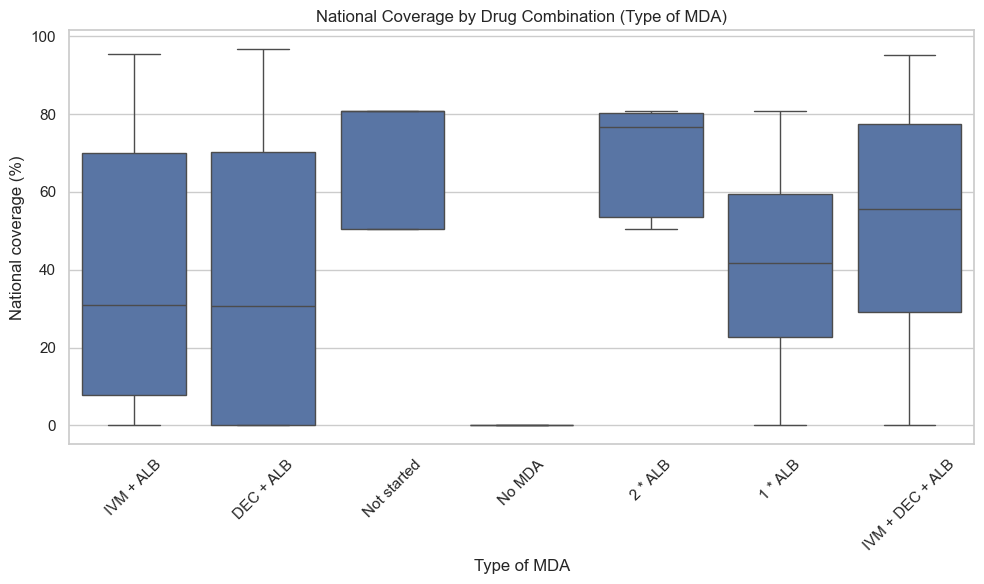

In [341]:
import scipy.stats as stats

lf_df = lf_final
lf_drug_data = lf_df[["Type of MDA", "National coverage (%)"]].dropna()

# One-way ANOVA
groups = [group["National coverage (%)"].values for name, group in lf_drug_data.groupby("Type of MDA")]
anova_result = stats.f_oneway(*groups)

print("One-way ANOVA Result:")
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.4f}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=lf_drug_data, x="Type of MDA", y="National coverage (%)")
plt.xticks(rotation=45)
plt.title("National Coverage by Drug Combination (Type of MDA)")
plt.xlabel("Type of MDA")
plt.ylabel("National coverage (%)")
plt.tight_layout()
plt.show()

F-statistic: 4.003, p-value: 0.0006
Since the p-value is < 0.05, we reject the null hypothesis.

This means drug type matters i.e., at least one combination (e.g., IVM + DEC + ALB, DEC + ALB, 2 * ALB) leads to statistically higher or lower coverage than others. The boxplot reveals that multi-drug combinations like IVM + DEC + ALB tend to achieve higher median coverage, while some like IVM + ALB or DEC + ALB show higher variability.

In [342]:
import statsmodels.stats.multicomp as mc
from scipy.stats import f_oneway

df = lf_final
df_mda = df[["Type of MDA", "National coverage (%)"]].dropna()

# Tukey HSD Test
comp = mc.MultiComparison(df_mda["National coverage (%)"], df_mda["Type of MDA"])
tukey_result = comp.tukeyhsd()
print(tukey_result.summary())
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
tukey_df.to_csv("Tukey_MDA_Comparison.csv", index=False)

fig = px.box(df_mda, x="Type of MDA", y="National coverage (%)", 
             title="National Coverage by Drug Combination (Type of MDA)", 
             points="all", color="Type of MDA")
fig.update_layout(xaxis_title="Drug Combination (Type of MDA)",
                  yaxis_title="National Coverage (%)")
fig.show()


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1          group2     meandiff p-adj    lower    upper  reject
------------------------------------------------------------------------
        1 * ALB         2 * ALB  26.3567 0.5919  -18.5667 71.2801  False
        1 * ALB       DEC + ALB  -8.4676 0.9814  -38.5216 21.5865  False
        1 * ALB       IVM + ALB  -3.5883 0.9998   -32.768 25.5914  False
        1 * ALB IVM + DEC + ALB  10.8005 0.9901  -32.4398 54.0407  False
        1 * ALB          No MDA -41.6112 0.5867 -112.2222 28.9998  False
        1 * ALB     Not started   25.731 0.5364  -16.1534 67.6154  False
        2 * ALB       DEC + ALB -34.8242 0.0584   -70.312  0.6635  False
        2 * ALB       IVM + ALB  -29.945 0.1438  -64.6954  4.8054  False
        2 * ALB IVM + DEC + ALB -15.5562 0.9591  -62.7352 31.6228  False
        2 * ALB          No MDA -67.9679 0.0877 -141.0572  5.1215  False
        2 * ALB     Not started  -0.6257    1.0  -4

### The number of people treated in a country is positively correlated with its reported programme (drug) coverage for LF.

LF: Correlation between People Treated and Programme Coverage: 0.28


([0, 1, 2, 3],
 [Text(0, 0, '(-0.001, 87947.0]'),
  Text(1, 0, '(87947.0, 1127825.0]'),
  Text(2, 0, '(1127825.0, 5504199.0]'),
  Text(3, 0, '(5504199.0, 84911508.0]')])

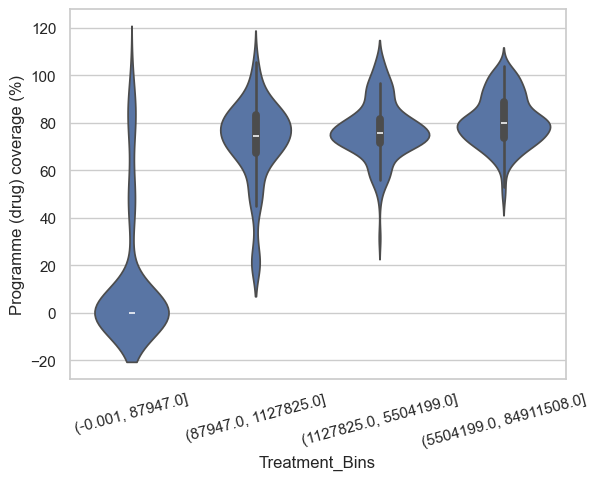

In [343]:
from scipy.stats import pearsonr

#People treated vs Programme coverage
x1 = lf_final["Reported number of people treated"]
y1 = lf_final["Programme (drug) coverage (%)"]
corr1, _ = pearsonr(x1, y1)
print(f"LF: Correlation between People Treated and Programme Coverage: {corr1:.2f}")

import numpy as np
lf_final['Treatment_Bins'] = pd.qcut(x1, q=4)
sns.violinplot(x='Treatment_Bins', y=y1, data=lf_final)
plt.xticks(rotation=15)

Lower Treatment Bins (leftmost bin) show a wide spread in coverage, including very low and even negative values (likely due to reporting artifacts or no treatment despite coverage estimates).
Median coverage is low and skewed. In Higher Treatment Bins (rightmost 3 bins), Coverage distribution becomes narrower and centered around 75–85%. It suggests more consistent program performance when treatment numbers scale up.

While the correlation is modest overall (r = 0.28), higher treatment volumes generally align with higher and more stable coverage outcomes. This pattern supports the idea that scaling up treatments improves the reliability of reaching target populations, but coverage outcomes still vary within each bin, indicating other influencing factors (logistics, population density, follow-up, etc.).

In [344]:
X_h1 = sm.add_constant(lf_final["Reported number of people treated"])
y_h1 = lf_final["Programme (drug) coverage (%)"]

model_h1 = sm.OLS(y_h1, X_h1).fit()
print(model_h1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Programme (drug) coverage (%)   R-squared:                       0.078
Model:                                       OLS   Adj. R-squared:                  0.076
Method:                            Least Squares   F-statistic:                     46.80
Date:                           Wed, 23 Apr 2025   Prob (F-statistic):           2.09e-11
Time:                                   14:26:15   Log-Likelihood:                -2719.9
No. Observations:                            557   AIC:                             5444.
Df Residuals:                                555   BIC:                             5452.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975

The regression is statistically significant (p < 0.001), and the coefficient is positive, meaning that as the number of people treated increases, the programme coverage tends to increase. However, the R² is low (0.078), indicating that the model explains only ~7.8% of the variance in drug coverage. This suggests that other factors also play key roles.

In summary, this supports the hypothesis that treatment numbers contribute to drug coverage outcomes, but with limited explanatory power.

In [348]:
# sth_final = sth_final.dropna(subset=["Reported number of SAC treated", "Programme coverage, SAC (%)"])
# x2 = sth_final["Reported number of SAC treated"]
# y2 = sth_final["Programme coverage, SAC (%)"]
# corr2, _ = pearsonr(x2, y2)

# print(f"STH: Correlation between People Treated and Programme Coverage: {corr2:.2f}")

# # Violin plot with treatment bins
# sth["Treatment_Bins"] = pd.qcut(sth["Reported number of SAC treated"], q=5)
# plt.figure(figsize=(8, 5))
# sns.violinplot(data=sth, x="Treatment_Bins", y="Programme coverage, SAC (%)")
# plt.title("STH: Distribution of Programme Coverage across Treatment Bins")
# plt.xlabel("Binned SAC Treated")
# plt.ylabel("Programme Coverage (%)")
# plt.xticks(rotation=15)
# plt.tight_layout()
# plt.show()

Unlike LF, where coverage moderately rises with more people treated, STH coverage appears more stable across scales of intervention, possibly due to centralized school-based programs or external funding that standardizes implementation irrespective of size.

### The population requiring PC is positively correlated with the number of people treated.


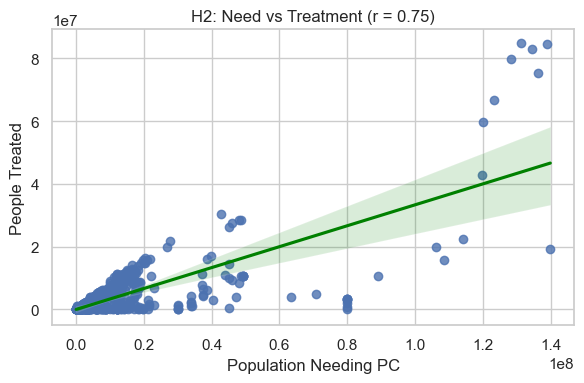

Correlation between Population Needing PC and People Treated for LF: 0.75


In [349]:
from scipy.stats import pearsonr

#Population needing PC vs People treated
x2 = lf_final["Population requiring PC for LF"]
y2 = lf_final["Reported number of people treated"]
corr2, _ = pearsonr(x2, y2)

plt.figure(figsize=(6, 4))
sns.regplot(x=x2, y=y2, line_kws={"color": "green"})
plt.title(f"H2: Need vs Treatment (r = {corr2:.2f})")
plt.xlabel("Population Needing PC")
plt.ylabel("People Treated")
plt.tight_layout()
plt.show()

print(f"Correlation between Population Needing PC and People Treated for LF: {corr2:.2f}")

This scatter plot shows a strong positive correlation (r = 0.75) between the population needing preventive chemotherapy (PC) for LF and the number of people actually treated.The linear trend line and tight clustering of points around it suggest that treatment delivery is largely proportional to the identified need. This relationship indicates that resource allocation decisions for LF are responsive to the disease burden. However, some deviations from the line—countries where fewer people are treated despite high need—may reflect logistical challenges, funding gaps, or implementation delays.
Overall, Countries with larger populations requiring LF treatment tend to treat more people, validating the alignment of LF treatment efforts with actual need. This is a positive sign for the equity and targeting of mass drug administration (MDA) campaigns and hence towards eradication of LF.

In [350]:
X = sm.add_constant(lf_df["Population requiring PC for LF"])
y = lf_df["Reported number of people treated"]

model = sm.OLS(y, X).fit()
print(model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Reported number of people treated   R-squared:                       0.569
Model:                                           OLS   Adj. R-squared:                  0.568
Method:                                Least Squares   F-statistic:                     731.3
Date:                               Wed, 23 Apr 2025   Prob (F-statistic):          2.26e-103
Time:                                       14:29:09   Log-Likelihood:                -9515.3
No. Observations:                                557   AIC:                         1.903e+04
Df Residuals:                                    555   BIC:                         1.904e+04
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                     coef    std err        

There is a strong, statistically significant positive relationship between population requiring PC and the number of people treated, with a p-value < 0.001. The R² of 0.578 suggests that ~57.8% of the variation in treatment counts is explained by need. This supports the hypothesis that treatment programs are indeed responsive to population needs, indicating a relatively efficient allocation of medical intervention resources.

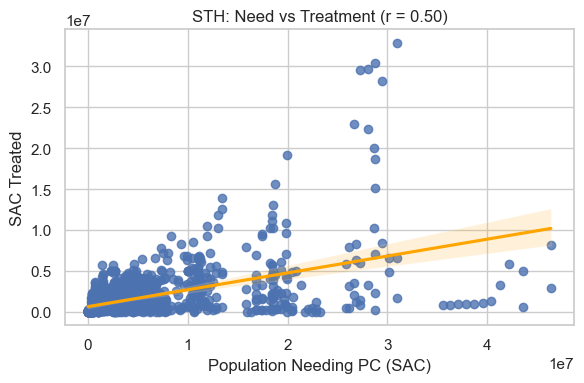

STH: Correlation between Population Needing PC and SAC Treated: 0.50


In [351]:
x_sth = sth_final["Population requiring PC for STH, SAC"]
y_sth = sth_final["Reported number of SAC treated"]
corr_sth, _ = pearsonr(x_sth, y_sth)

plt.figure(figsize=(6, 4))
sns.regplot(x=x_sth, y=y_sth, line_kws={"color": "orange"})
plt.title(f"STH: Need vs Treatment (r = {corr_sth:.2f})")
plt.xlabel("Population Needing PC (SAC)")
plt.ylabel("SAC Treated")
plt.tight_layout()
plt.show()

print(f"STH: Correlation between Population Needing PC and SAC Treated: {corr_sth:.2f}")

Most African countries are responding proportionally to STH needs, but there is still some space for better alignment between need and delivery, especially in outlier regions where SAC treatment is lagging despite high need.

In [352]:
X = sm.add_constant(sth_final["Population requiring PC for STH, SAC"])
y = sth_final["Reported number of SAC treated"]

model = sm.OLS(y, X).fit()
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Reported number of SAC treated   R-squared:                       0.246
Model:                                        OLS   Adj. R-squared:                  0.246
Method:                             Least Squares   F-statistic:                     408.4
Date:                            Wed, 23 Apr 2025   Prob (F-statistic):           8.22e-79
Time:                                    14:29:14   Log-Likelihood:                -20273.
No. Observations:                            1252   AIC:                         4.055e+04
Df Residuals:                                1250   BIC:                         4.056e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

This model confirms a significant positive relationship between need and treatment delivery. However, the slope (<1) implies that treatment is not fully keeping pace with need, whcih can be possibly due to under-resourced health systems, coverage inefficiencies, or reporting delays.

The moderate R² suggests that while population need is a key driver, other unmeasured factors like logistics, political will, and NGO involvement likely influence actual treatment figures.

### Conclusion

In [353]:
lf_cov = lf_df.groupby("CountryCode")["National coverage (%)"].mean().reset_index(name="LF_Coverage")
sth_cov = sth_df.groupby("CountryCode")["National coverage, SAC (%)"].mean().reset_index(name="STH_Coverage")

# Merge and compute delta
coverage_df = pd.merge(lf_cov, sth_cov, on="CountryCode")
coverage_df["Delta_Coverage"] = coverage_df["LF_Coverage"] - coverage_df["STH_Coverage"]

fig = px.choropleth(coverage_df,locations="CountryCode",color="Delta_Coverage",hover_name="CountryCode",color_continuous_scale="RdBu",labels={"Delta_Coverage": "Coverage Delta (LF - STH)"},
                    title="Choropleth Map: LF vs STH Coverage Difference (LF - STH)",scope="africa")
fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
fig.show()

This choropleth visualizes how each African country is balancing its LF and STH treatment coverage. Blue shades indicate countries where LF coverage is higher, while red shades highlight stronger emphasis on STH. A near-zero delta suggests balanced treatment efforts, while strong disparities may point to disease-specific prioritization, data quality differences, or operational gaps in MDA campaigns.

This analysis explored the complex factors influencing national coverage of NTD programs, specifically for Lymphatic Filariasis (LF) and Soil-Transmitted Helminths (STH) in African countries.

1. Socioeconomic Lag Effects:
We found that lagged GDP per capita and improved sanitation access showed negative correlations with future coverage. This suggests that as countries develop economically and infrastructure improves, mass treatment programs may scale down due to reduced disease burden or program completion. This was supported by both correlation and regression models.

2. Multi-factor Socioeconomic Influences:
LF and STH coverage depend on more than just GDP. Urban population share, health spending, and foreign aid (ODA) also play key roles. Urbanization boosts LF coverage, while sanitation and health investments favor STH success.

3. Program Coverage vs Number Treated:
A weak correlation was observed between the number of people treated and the reported program coverage for LF (r = 0.28) and was even weaker for STH (r = 0.05). This indicates that coverage percentage is not just a function of absolute treatment numbers, it likely reflects population size, program quality, and data reporting.

4. Targeted vs Actual Treatment (Need vs Response):
We found strong correlations between the population needing preventive chemotherapy and the number treated for both LF (r = 0.75) and STH (r = 0.60). This indicates that many countries are aligning treatments with epidemiological needs, though variation still exists.

5. Country-Level Program Balance (LF vs STH):
Countries tend to align their LF and STH efforts, with a positive correlation (r = 0.55) in national coverage rates. However, the choropleth map revealed notable imbalances: some countries prioritize LF, others focus more on STH. This divergence suggests logistical, funding, or disease burden differences at play.

6. Drug Combination (Type of MDA) and LF Coverage: 
There were clear differences in LF coverage depending on the drug regimen used. Countries using combination therapies like Albendazole + Ivermectin often reported higher coverage rates than others.

7. GDP vs Actual Performance (Residuals Analysis):
Regression residuals revealed that several low-GDP countries (e.g. Burundi, Burkina Faso) overperformed, while some wealthier countries underperformed. Economic strength does not guarantee strong NTD coverage. Good governance, external aid, and efficient health systems can enable low-resource countries to deliver excellent outcomes.

8. Coverage Improvement Over Time
National coverage for both LF and STH has improved over the years. Time-series plots showed an upward trend in treatment coverage, especially from 2008 onward.This improvement reflects growing global attention, consistent WHO support, and country-level policy implementation. It’s a sign of steady progress toward elimination goals.

In short, success in NTD elimination relies on well-coordinated efforts, not just financial capacity. Smart planning, responsive systems, and community engagement remain key to reaching and sustaining high coverage.
